## Ensemble learning 

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import datasets
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
iris = datasets.load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [3]:
def plot_decision_boundary(classifier, x, y,resolution=0.05):
    
    # only for two features possible
    x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max,resolution),np.arange(x2_min, x2_max,resolution))
    xx = np.append(xx1.flatten()[:,np.newaxis],xx2.flatten()[:,np.newaxis],axis=1)
    yy = classifier.predict(xx).reshape(xx1.shape)
    
    # plot decision boundary
    plt.contourf(xx1, xx2, yy, alpha=0.4)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    unique_ = np.unique(y)
    for i in range(len(unique_)):
        xclass = x[np.where(y==unique_[i])]
        label = 'class '+str(i)
        plt.scatter(xclass[:,0],xclass[:,1],label=label) 
    plt.legend()
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.show()

## Hard Voting

In [4]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
voting_clf = VotingClassifier(estimators=[('lr', log_clf), 
                                          ('rf', rnd_clf), 
                                          ('svc', svm_clf)],voting='hard')
voting_clf.fit(X_train, y_train)

G:\Anaconda\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
G:\Anaconda\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
G:\Anaconda\envs\tensorflow_cpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Anaconda\envs\tensorflow_cpu\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", Fu

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',...
                                        

In [5]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.9736842105263158
RandomForestClassifier 0.9736842105263158
SVC 1.0
VotingClassifier 1.0


G:\Anaconda\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
G:\Anaconda\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
G:\Anaconda\envs\tensorflow_cpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
G:\Anaconda\envs\tensorflow_cpu\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", Fu

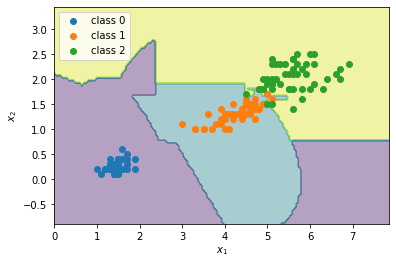

In [6]:
plot_decision_boundary(voting_clf, X, y,resolution=0.05)

## Bagging

In [7]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

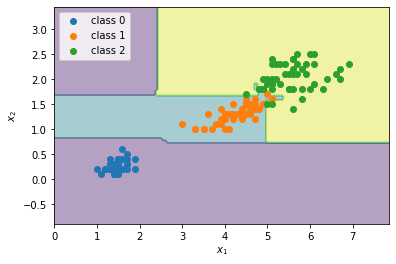

In [8]:
plot_decision_boundary(bag_clf, X, y,resolution=0.05)

With out-of-bagging validation

In [9]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                            bootstrap=True, n_jobs=-1, oob_score=True)
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

In [10]:
bag_clf.oob_score_

0.9285714285714286

In [11]:
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [12]:
bag_clf.oob_decision_function_

array([[0.        , 0.01666667, 0.98333333],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.9939759 , 0.0060241 ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.01111111, 0.98888889],
       [0.        , 0.01      , 0.99      ],
       [0.        , 0.07204861, 0.92795139],
       [0.        , 1.        , 0.        ],
       [0.        , 0.42424242, 0.57575758],
       [1.        , 0.        , 0.        ],
       [0.        , 0.01123596, 0.98876404],
       [0.        , 1.        , 0.        ],
       [0.        , 0.01197605, 0.98802395],
       [1.

## Random Forest

In [13]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

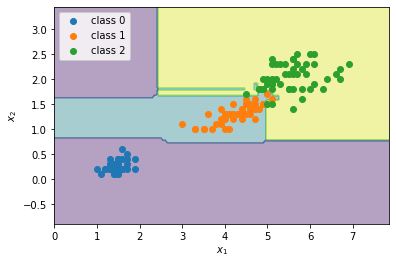

In [14]:
plot_decision_boundary(rnd_clf, X, y,resolution=0.05)

## Feature Importance

In [15]:
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.0975183759153614
sepal width (cm) 0.02761845883478006
petal length (cm) 0.4280763762678198
petal width (cm) 0.4467867889820389
